In [27]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# linear regression

In [15]:
#data definition
x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[1],[2],[3]])

#weight initialization
W = torch.zeros(1,requires_grad=True) #초기값
b = torch.zeros(1,requires_grad=True)

#optimizer설정
optimizer = optim.SGD([W,b],lr = 0.01)

nb_epochs = 1000
for epoch in range(nb_epochs+1):
  #H(x)계산
  hypothesis = x_train * W + b 

  cost = torch.mean((hypothesis - y_train)**2) #F.mse_cost(hypothesis, y_train)

  optimizer.zero_grad() #gradient초기화
  cost.backward() #gradient 계산
  optimizer.step() #step으로 개선

  if epoch % 100 == 0:
    print('Epoch {:4d}/{} W:{:.3f} b:{:.3f} cost:{:.6f}'.format(
        epoch, nb_epochs, W.item(), b.item(), cost.item()
    ))

Epoch    0/1000 W:0.093 b:0.040 cost:4.666667
Epoch  100/1000 W:0.873 b:0.289 cost:0.012043
Epoch  200/1000 W:0.900 b:0.227 cost:0.007442
Epoch  300/1000 W:0.921 b:0.179 cost:0.004598
Epoch  400/1000 W:0.938 b:0.140 cost:0.002842
Epoch  500/1000 W:0.951 b:0.110 cost:0.001756
Epoch  600/1000 W:0.962 b:0.087 cost:0.001085
Epoch  700/1000 W:0.970 b:0.068 cost:0.000670
Epoch  800/1000 W:0.976 b:0.054 cost:0.000414
Epoch  900/1000 W:0.981 b:0.042 cost:0.000256
Epoch 1000/1000 W:0.985 b:0.033 cost:0.000158


# minimizing cost
## gradient descent

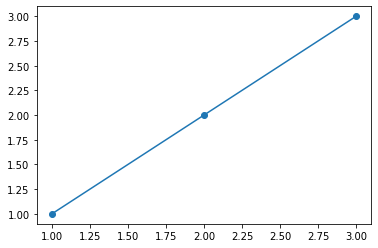

In [29]:
#data
plt.scatter(x_train,y_train)
#best-fit line
xs = np.linspace(1,3,1000) #np.linspace(start,end,num간격개수) 
plt.plot(xs,xs)

In [ ]:
#gradient by hand
gradient = torch.sum((W*x_trian - y_train) * x_train)

In [32]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])
# 모델 초기화
W = torch.zeros(1)
# learning rate 설정
lr = 0.1

nb_epochs = 10
for epoch in range(nb_epochs + 1):
  hypothesis = x_train * W
  cost = torch.mean((hypothesis - y_train)**2)
  gradient = torch.sum((W*x_train - y_train)* x_train) #optim을 통해서 가능

  print('Epoch:{:4d}/{} W: {:.3f} Cost: {:.6f}'.format(
      epoch, nb_epochs, W.item(), cost.item()
  ))
  # cost gradient로 H(x) 개선
  W -= lr * gradient  #optimizer.step()
  """
  optimizer = optim.SGD([W],lr=0.15)
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()
  """

Epoch:   0/10 W: 0.000 Cost: 4.666667
Epoch:   1/10 W: 1.400 Cost: 0.746666
Epoch:   2/10 W: 0.840 Cost: 0.119467
Epoch:   3/10 W: 1.064 Cost: 0.019115
Epoch:   4/10 W: 0.974 Cost: 0.003058
Epoch:   5/10 W: 1.010 Cost: 0.000489
Epoch:   6/10 W: 0.996 Cost: 0.000078
Epoch:   7/10 W: 1.002 Cost: 0.000013
Epoch:   8/10 W: 0.999 Cost: 0.000002
Epoch:   9/10 W: 1.000 Cost: 0.000000
Epoch:  10/10 W: 1.000 Cost: 0.000000


# multivariate linear regression

In [35]:
# 데이터
x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [37]:
#weight initialization
W1 = torch.zeros(1,requires_grad=True) #초기값
W2 = torch.zeros(1,requires_grad=True) #초기값
W3 = torch.zeros(1,requires_grad=True) #초기값
b = torch.zeros(1,requires_grad=True)

#optimizer설정
optimizer = optim.SGD([W1,W2,W3,b],lr = 1e-5)

nb_epochs = 1000
for epoch in range(nb_epochs+1):
  #H(x) 계산
  hypothesis = x1_train * W1 + x2_train * W2 + x3_train * W3 + b

  #cost 계산
  cost = torch.mean((hypothesis - y_train)**2) #F.mse_cost(hypothesis, y_train)

  #cost로 H(x)개선
  optimizer.zero_grad() #gradient초기화
  cost.backward() #gradient 계산
  optimizer.step() #step으로 개선

  if epoch % 100 == 0:
    print('Epoch {:4d}/{} W1:{:.3f} W2:{:.3f} W3:{:.3f} b:{:.3f} cost:{:.6f}'.format(
        epoch, nb_epochs, W1.item(), W2.item(),W3.item(),b.item(), cost.item()
    ))

Epoch    0/1000 W1:0.294 W2:0.294 W3:0.297 b:0.003 cost:29661.800781
Epoch  100/1000 W1:0.674 W2:0.661 W3:0.676 b:0.008 cost:1.563628
Epoch  200/1000 W1:0.679 W2:0.655 W3:0.677 b:0.008 cost:1.497595
Epoch  300/1000 W1:0.684 W2:0.649 W3:0.677 b:0.008 cost:1.435044
Epoch  400/1000 W1:0.689 W2:0.643 W3:0.678 b:0.008 cost:1.375726
Epoch  500/1000 W1:0.694 W2:0.638 W3:0.678 b:0.009 cost:1.319507
Epoch  600/1000 W1:0.699 W2:0.633 W3:0.679 b:0.009 cost:1.266222
Epoch  700/1000 W1:0.704 W2:0.627 W3:0.679 b:0.009 cost:1.215703
Epoch  800/1000 W1:0.709 W2:0.622 W3:0.679 b:0.009 cost:1.167810
Epoch  900/1000 W1:0.713 W2:0.617 W3:0.680 b:0.009 cost:1.122429
Epoch 1000/1000 W1:0.718 W2:0.613 W3:0.680 b:0.009 cost:1.079390


In [47]:
#multivariate의 변수를 하나씩 쓰는것은 귀찮은 일!! 그렇다면 nn.Module을 사용해보자!
class MultivariateLinearRegressionModel(nn.Module): #pytorch의 모든 모델을 상속해서
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(3,1)
  def forward(self, x):
    return self.linear(x)

In [38]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [39]:
print(x_train.shape)
print(y_train.shape)

torch.Size([5, 3])
torch.Size([5, 1])


In [41]:
W = torch.zeros((3,1),requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W,b],lr = 1e-5) #optim.SGD(model.parameters(),lr=1e-5)

nb_epochs = 20
for epoch in range(nb_epochs + 1):
  hypothesis = x_train@W + b #hypothesis = model(x_train)
  cost = torch.mean((hypothesis - y_train) **2) #cost = F.mse_loss(hypothesis, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # 100번마다 로그 출력
  print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
      epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()
  ))

Epoch    0/20 hypothesis: tensor([0., 0., 0., 0., 0.]) Cost: 29661.800781
Epoch    1/20 hypothesis: tensor([67.2578, 80.8397, 79.6523, 86.7394, 61.6605]) Cost: 9298.520508
Epoch    2/20 hypothesis: tensor([104.9128, 126.0990, 124.2466, 135.3015,  96.1821]) Cost: 2915.712402
Epoch    3/20 hypothesis: tensor([125.9942, 151.4381, 149.2133, 162.4896, 115.5097]) Cost: 915.040527
Epoch    4/20 hypothesis: tensor([137.7967, 165.6247, 163.1911, 177.7112, 126.3307]) Cost: 287.936096
Epoch    5/20 hypothesis: tensor([144.4044, 173.5674, 171.0168, 186.2332, 132.3891]) Cost: 91.371063
Epoch    6/20 hypothesis: tensor([148.1035, 178.0143, 175.3980, 191.0042, 135.7812]) Cost: 29.758249
Epoch    7/20 hypothesis: tensor([150.1744, 180.5042, 177.8509, 193.6753, 137.6805]) Cost: 10.445267
Epoch    8/20 hypothesis: tensor([151.3336, 181.8983, 179.2240, 195.1707, 138.7440]) Cost: 4.391237
Epoch    9/20 hypothesis: tensor([151.9824, 182.6789, 179.9928, 196.0079, 139.3396]) Cost: 2.493121
Epoch   10/20 hypo

# Loading Data
## minibatch gradient descent
많은 양의 데이터를 한꺼번에 학습하려면 하드웨어적으로 불가능하거나 연산이 굉장히 느림.. 그러면 전체데이터를 균일하게 나누어서 학습해보자! 

업데이트를 좀 더 빠르게 할 수 있음

전체 데이터를 쓰지 않아 잘못된 방향으로 업데이트를 하게 될 수도 있음

In [43]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
  def __init__(self):
    self.x_data =[[73,80,75],#a학생 점수
                  [93,88,93],#b학생 점수
                  [89,91,90],#c학생 점수
                  [96,98,100],#d학생 점수
                  [71,66,70]]#e학생 점수
    self.y_data = [[152],[185],[180],[196],[142]]

  def __len__(self): #데이터셋의 총 데이터 수 = 5
    return len(self.x_data)
  def __getitem__(self,idx): #idx받았을 때 상응하는 입출력 데이터 반환
    x = torch.FloatTensor(self.x_data[idx])
    y = torch.FloatTensor(self.y_data[idx])
    return x,y
  
dataset = CustomDataset()

In [44]:
from torch.utils.data import DataLoader

dataloader= DataLoader(
    dataset,
    batch_size = 2, #통상적으로 2의 제곱수로
    shuffle = True #Epoch마다 데이터셋을 섞어서 데이터가 학습되는 순서를 바꿈. 데이터의 순서를 모델이 외우지 못하도록함
)

In [ ]:
# 데이터
x_train = torch.FloatTensor(dataset.x_data)
y_train = torch.FloatTensor(dataset.y_data)
# 모델 초기화
model = MultivariateLinearRegressionModel()
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1e-5)

nb_epochs = 20
for epoch in range(nb_epochs+1): 
    for batch_idx, samples in enumerate(dataloader):#mini-batch
      # H(x) 계산
      prediction = model(x_train)
      
      # cost 계산
      cost = F.mse_loss(prediction, y_train)
      
      # cost로 H(x) 개선
      optimizer.zero_grad()
      cost.backward()
      optimizer.step()
      
      # 20번마다 로그 출력 전체 epoch는 20번 , mini batch 3회(5개의 데이터를 2개씩 gradient) ->20*3
      print('Epoch {:4d}/{} Batch{}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs,batch_idx + 1, len(dataloader),cost.item()
      ))

# Logistic Regression
- binary classification
- w = w - learning rate * gradient

In [50]:
torch.manual_seed(1) 

In [51]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]] #(6,2) 2차원의 6개의 샘플
y_data = [[0], [0], [0], [1], [1], [1]] 

In [52]:
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [53]:
W = torch.zeros((2,1),requires_grad = True)
b = torch.zeros(1, requires_grad = True)

### hypothesis

In [57]:
hypothesis = 1/ (1+ torch.exp(-(x_train@W + b)))#sigmoid공식
hypothesis_bysig = torch.sigmoid(x_train@W+b) #torch에서 sigmoid제공하지롱~~

In [58]:
print(hypothesis)
print(hypothesis.shape)
print(hypothesis_bysig)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)
torch.Size([6, 1])
tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward>)


### cost function

In [60]:
losses = -(y_train*torch.log(hypothesis) + (1-y_train) *torch.log(1-hypothesis))
#F.binary_cross_entropy(hypothesis, y_train)
print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward>)


In [62]:
cost = losses.mean()
cost

tensor(0.6931, grad_fn=<MeanBackward0>)

In [76]:
# 모델 초기화
W = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W,b], lr=1)

nb_epochs =100
for epoch in range(nb_epochs+1): 
      # H(x) 계산
      hypothesis = torch.sigmoid(x_train@W +b)
      
      # cost 계산
      cost = F.binary_cross_entropy(hypothesis, y_train)
      
      # cost로 H(x) 개선
      optimizer.zero_grad()
      cost.backward()
      optimizer.step()
      
      # 100번마다 로그 출력
      if epoch % 10 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/100 Cost: 0.693147
Epoch   10/100 Cost: 0.671355
Epoch   20/100 Cost: 0.590509
Epoch   30/100 Cost: 0.487127
Epoch   40/100 Cost: 0.401081
Epoch   50/100 Cost: 0.319570
Epoch   60/100 Cost: 0.245772
Epoch   70/100 Cost: 0.189174
Epoch   80/100 Cost: 0.158494
Epoch   90/100 Cost: 0.144626
Epoch  100/100 Cost: 0.134722


In [77]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis[:5])

tensor([[0.0242],
        [0.1476],
        [0.2745],
        [0.7957],
        [0.9487]], grad_fn=<SliceBackward>)


In [80]:
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction[:5].float())
print(y_train[:5])

tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.]])
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.]])


In [81]:
correct_prediction = prediction.float() == y_train
print(correct_prediction[:5].float())

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]])


## nn.Module

In [85]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))

In [86]:
model = BinaryClassifier()

In [87]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 100
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 20번마다 로그 출력
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5])
        correct_prediction = prediction.float() == y_train
        accuracy = correct_prediction.sum().item() / len(correct_prediction)
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format(
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))


Epoch    0/100 Cost: 0.734527 Accuracy 50.00%
Epoch   10/100 Cost: 0.446570 Accuracy 66.67%
Epoch   20/100 Cost: 0.448868 Accuracy 66.67%
Epoch   30/100 Cost: 0.375859 Accuracy 83.33%
Epoch   40/100 Cost: 0.318583 Accuracy 83.33%
Epoch   50/100 Cost: 0.268096 Accuracy 83.33%
Epoch   60/100 Cost: 0.222295 Accuracy 100.00%
Epoch   70/100 Cost: 0.183465 Accuracy 100.00%
Epoch   80/100 Cost: 0.158036 Accuracy 100.00%
Epoch   90/100 Cost: 0.144541 Accuracy 100.00%
Epoch  100/100 Cost: 0.134652 Accuracy 100.00%
